In [1]:
import pandas as pd
import numpy as np

## **About Dataset**
This dataset is having data of customers who buys clothes online. The store offers in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website.


In [2]:
df = pd.read_csv("Ecommerce Customers.csv")
df.head(10)


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692\nJosephbury, WV 9...",DarkSlateBlue,32.021596,11.366348,36.683776,4.685017,521.572175
7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146
8,vchurch@walter-martinez.com,"860 Lee Key\nWest Debra, SD 97450-0495",Salmon,33.987773,13.386235,37.534497,3.273434,570.200409
9,bonnie69@lin.biz,"PSC 2734, Box 5255\nAPO AA 98456-7482",Brown,31.936549,11.814128,37.145168,3.202806,427.199385


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## **Exploratory Data Analysis (EDA)**

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

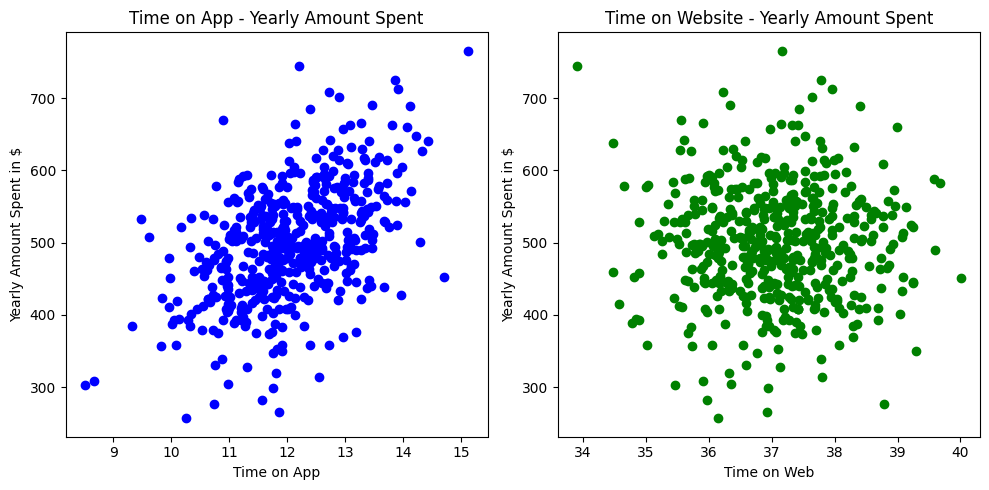

In [6]:

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)  # One row, two columns, first subplot
plt.scatter(df['Time on App'], df['Yearly Amount Spent'], color='blue')
plt.title('Time on App - Yearly Amount Spent')
plt.xlabel("Time on App")
plt.ylabel("Yearly Amount Spent in $")

plt.subplot(1, 2, 2)  # One row, two columns, second subplot
plt.scatter(df['Time on Website'], df['Yearly Amount Spent'], color='green')
plt.title('Time on Website - Yearly Amount Spent')
plt.xlabel("Time on Web")
plt.ylabel("Yearly Amount Spent in $")

plt.tight_layout()  # Adjust subplot layout to avoid overlapping
plt.show()

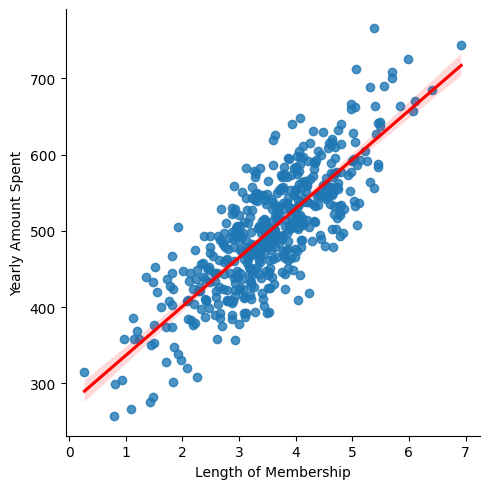

In [7]:
sns.lmplot(
    x= "Length of Membership",
    y= "Yearly Amount Spent",
    data = df,
    line_kws={'color': 'red'}
)



## **Model Training**


### **1. Train Test Splitting**

In [8]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [9]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
y_train.count()

400

### **2. Model Training**

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(X_train, y_train)

LinearRegression()

#### Coefficients for all independent(x) variables

In [16]:
pd.DataFrame(lr.coef_, X.columns, columns=["Coefficient"])

,Coefficient
Avg. Session Length,25.888150
Time on App,38.870465
Time on Website,0.470662
Length of Membership,61.783690


In [17]:
predictions = lr.predict(X_test)

In [18]:
len(predictions)

100

In [19]:
predictions

array([438.46488066, 489.6618454 , 370.06954186, 513.8590556 ,
       495.69799868, 450.88726525, 458.01303756, 336.6655623 ,
       528.51544919, 663.27832042, 559.42244861, 526.02431274,
       552.20571747, 457.67586182, 450.15607779, 431.65097987,
       563.58511617, 408.35440214, 599.61853988, 486.84826737,
       716.65493547, 496.79327186, 411.49845257, 556.55139426,
       551.84576857, 398.18338551, 421.30757507, 395.15395642,
       548.52797678, 463.48718386, 558.43909636, 505.52726976,
       505.87531544, 463.94575658, 425.98372449, 401.07293164,
       503.60337906, 430.34122821, 569.63274307, 421.89472114,
       487.26750654, 602.37423872, 616.44671945, 589.39491734,
       449.73449152, 379.92615446, 558.17328317, 462.72008747,
       502.16865444, 401.43462317, 523.84624174, 416.80395478,
       576.8712195 , 478.50455211, 457.24801931, 397.67512992,
       564.8697802 , 305.13130981, 562.63197525, 476.33492249,
       499.04418098, 433.98746406, 463.72067764, 576.91

### **3. Model Evaluation** 

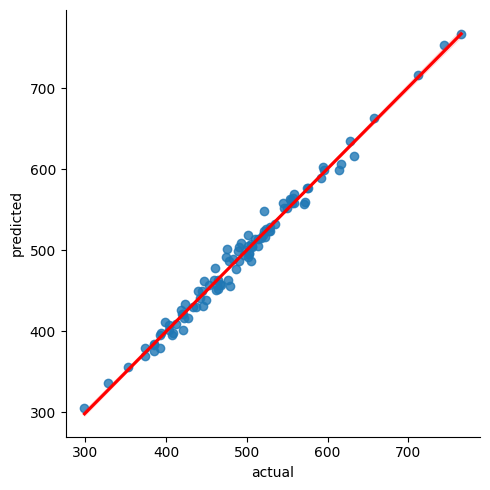

In [20]:
# plt.scatter(predictions, y_test)
# plt.xlabel("predictions")
# plt.ylabel("Acctual Values")

predDF = pd.DataFrame({"actual": y_test, "predicted":predictions})

sns.lmplot(
    x= "actual",
    y= "predicted",
    data = predDF,
    line_kws={'color': 'red'}
)




In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [22]:
print(f'Mean Squared Error: {mean_squared_error(y_test, predictions)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, predictions)}') 
print(f'Root Mean Squared Error (RMSE): {math.sqrt(mean_squared_error(y_test, predictions))}')

Mean Squared Error: 92.8901030449849
Mean Absolute Error: 7.64567479891527
Root Mean Squared Error (RMSE): 9.637951185028118


Text(0.5, 1.0, 'Randomness of residuals')

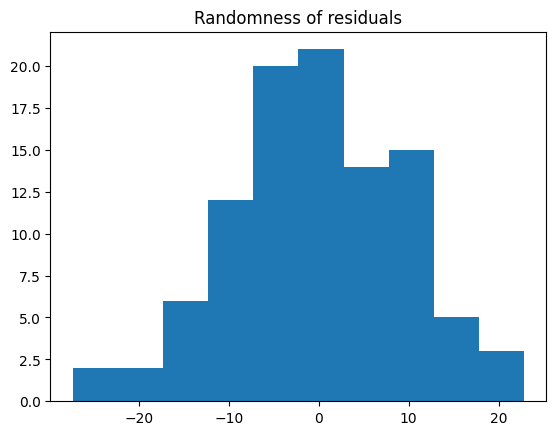

In [23]:
residuals = y_test - predictions
plt.hist(residuals)
plt.title("Randomness of residuals")

### **4. Save the Model**

In [24]:
import pickle
pickle.dump(lr, open('lr_model.pkl','wb'))

### **5. Loading Saved Model for Predictions**

In [25]:
lr_model = pickle.load(open('lr_model.pkl','rb'))

In [28]:
print(lr_model.predict([[34.497268, 30.655651, 12.577668, 4.082621]]))

[1282.27827233]


e:\Programs\Python Codes\GDSC AIML\ml project 1\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
